In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

In [11]:
df1 = pd.read_csv("../../../Resources/Raw_Files/YFINANCE/ITOT_1d_data.csv")

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1507 non-null   object 
 1   Open           1507 non-null   float64
 2   High           1507 non-null   float64
 3   Low            1507 non-null   float64
 4   Close          1507 non-null   float64
 5   Volume         1507 non-null   int64  
 6   Dividends      1507 non-null   float64
 7   Stock Splits   1507 non-null   float64
 8   Capital Gains  1507 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 106.1+ KB


In [13]:
df1.shape, df1.head()

((1507, 9),
          Date       Open       High        Low      Close   Volume  Dividends  \
 0  2020-01-02  66.981712  67.137524  66.688415  67.128357  1246500        0.0   
 1  2020-01-03  66.477621  66.945065  66.385967  66.715927  2069300        0.0   
 2  2020-01-06  66.440962  66.972565  66.248487  66.972565  2158400        0.0   
 3  2020-01-07  66.835075  66.926729  66.670095  66.761749  1163500        0.0   
 4  2020-01-08  66.807575  67.375841  66.798408  67.064209  1046300        0.0   
 
    Stock Splits  Capital Gains  
 0           0.0            0.0  
 1           0.0            0.0  
 2           0.0            0.0  
 3           0.0            0.0  
 4           0.0            0.0  )

In [14]:
df2 = pd.read_csv("../../../Resources/Raw_Files/FRED/fred_macro_data.csv")

In [15]:
df2.info(), df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       2190 non-null   object 
 1   GDP                                        2190 non-null   float64
 2   CPI_Inflation                              2190 non-null   float64
 3   Average_price_of_eggs                      2190 non-null   float64
 4   Average_price_of_electricity               2190 non-null   float64
 5   Leading_Index_for_US                       2190 non-null   float64
 6   NBER_Recession_Indicator                   2190 non-null   float64
 7   Producer_Price_Index                       2190 non-null   float64
 8   5-Year_Breakeven_Inflation                 2190 non-null   float64
 9   Natural_Rate__of_Unemployment_(est.)       2190 non-null   float64
 10  Civilian_Labor_Force_Par

(None,
          Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0  2020-01-03  21751.238        259.127                  1.461   
 1  2020-01-04  21751.238        259.127                  1.461   
 2  2020-01-05  21751.238        259.127                  1.461   
 3  2020-01-06  21751.238        259.127                  1.461   
 4  2020-01-07  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                        1

In [16]:
merged = df1.merge(df2, on="Date", how="inner")

In [17]:
merged.shape, merged.head()

((1506, 55),
          Date       Open       High        Low      Close   Volume  Dividends  \
 0  2020-01-03  66.477621  66.945065  66.385967  66.715927  2069300        0.0   
 1  2020-01-06  66.440962  66.972565  66.248487  66.972565  2158400        0.0   
 2  2020-01-07  66.835075  66.926729  66.670095  66.761749  1163500        0.0   
 3  2020-01-08  66.807575  67.375841  66.798408  67.064209  1046300        0.0   
 4  2020-01-09  67.485832  67.559157  67.311691  67.531662   868900        0.0   
 
    Stock Splits  Capital Gains        GDP  ...  U_Mich_Consumer_Sentiment  \
 0           0.0            0.0  21751.238  ...                       99.8   
 1           0.0            0.0  21751.238  ...                       99.8   
 2           0.0            0.0  21751.238  ...                       99.8   
 3           0.0            0.0  21751.238  ...                       99.8   
 4           0.0            0.0  21751.238  ...                       99.8   
 
    Chicago_Fed_Nationa

In [18]:
merged.shape, merged.head()

((1506, 55),
          Date       Open       High        Low      Close   Volume  Dividends  \
 0  2020-01-03  66.477621  66.945065  66.385967  66.715927  2069300        0.0   
 1  2020-01-06  66.440962  66.972565  66.248487  66.972565  2158400        0.0   
 2  2020-01-07  66.835075  66.926729  66.670095  66.761749  1163500        0.0   
 3  2020-01-08  66.807575  67.375841  66.798408  67.064209  1046300        0.0   
 4  2020-01-09  67.485832  67.559157  67.311691  67.531662   868900        0.0   
 
    Stock Splits  Capital Gains        GDP  ...  U_Mich_Consumer_Sentiment  \
 0           0.0            0.0  21751.238  ...                       99.8   
 1           0.0            0.0  21751.238  ...                       99.8   
 2           0.0            0.0  21751.238  ...                       99.8   
 3           0.0            0.0  21751.238  ...                       99.8   
 4           0.0            0.0  21751.238  ...                       99.8   
 
    Chicago_Fed_Nationa

In [19]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       1506 non-null   object 
 1   Open                                       1506 non-null   float64
 2   High                                       1506 non-null   float64
 3   Low                                        1506 non-null   float64
 4   Close                                      1506 non-null   float64
 5   Volume                                     1506 non-null   int64  
 6   Dividends                                  1506 non-null   float64
 7   Stock Splits                               1506 non-null   float64
 8   Capital Gains                              1506 non-null   float64
 9   GDP                                        1506 non-null   float64
 10  CPI_Inflation           

In [20]:
drop_list = ['Date','Open', 'High', 'Low']

In [21]:
merged = merged.drop(drop_list,axis=1)

In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Close                                      1506 non-null   float64
 1   Volume                                     1506 non-null   int64  
 2   Dividends                                  1506 non-null   float64
 3   Stock Splits                               1506 non-null   float64
 4   Capital Gains                              1506 non-null   float64
 5   GDP                                        1506 non-null   float64
 6   CPI_Inflation                              1506 non-null   float64
 7   Average_price_of_eggs                      1506 non-null   float64
 8   Average_price_of_electricity               1506 non-null   float64
 9   Leading_Index_for_US                       1506 non-null   float64
 10  NBER_Recession_Indicator

In [23]:
merged = merged.fillna(0)

In [24]:
df3 = merged.copy()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df3.drop(['Close'],axis=1),
                                    df3['Close'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)

* Train set: (1204, 50) (1204,) 
* Test set: (302, 50) (302,)


In [26]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor

def pipeline_adaboost_reg():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(RandomForestRegressor(random_state=101)) ),
      ( "model", RandomForestRegressor(random_state=101)),

    ])

  return pipeline

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  # documentation is here
param_grid = {"model__n_estimators":[10,20],
              }

param_grid

{'model__n_estimators': [10, 20]}

In [28]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline_adaboost_reg(),
                    param_grid=param_grid,
                    cv=2,
                    n_jobs=-2,
                    verbose=3,  # for learning, we set 3 to print the score from every cross-validation
                    scoring='r2')


grid.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('feat_scaling', StandardScaler()),
                                       ('feat_selection',
                                        SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                                       ('model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-2, param_grid={'model__n_estimators': [10, 20]},
             scoring='r2', verbose=3)

In [29]:
grid.cv_results_

{'mean_fit_time': array([1.16948044, 1.18269825]),
 'std_fit_time': array([0.02263606, 0.00249672]),
 'mean_score_time': array([0.02447474, 0.02520084]),
 'std_score_time': array([0.00215423, 0.00048995]),
 'param_model__n_estimators': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value=999999),
 'params': [{'model__n_estimators': 10}, {'model__n_estimators': 20}],
 'split0_test_score': array([0.99500731, 0.99545778]),
 'split1_test_score': array([0.99543987, 0.99577432]),
 'mean_test_score': array([0.99522359, 0.99561605]),
 'std_test_score': array([0.00021628, 0.00015827]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [30]:
(pd.DataFrame(grid.cv_results_)
.sort_values(by='mean_test_score',ascending=False)
.filter(['params','mean_test_score'])
.values
 )

array([[{'model__n_estimators': 20}, 0.9956160532351832],
       [{'model__n_estimators': 10}, 0.9952235933455741]], dtype=object)

In [31]:
grid.best_params_

{'model__n_estimators': 20}

In [32]:
pipeline = grid.best_estimator_
pipeline

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model',
                 RandomForestRegressor(n_estimators=20, random_state=101))])

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train, X_test, y_test,pipeline):
	print("Model Evaluation \n")
	print("* Train Set")
	regression_evaluation(X_train,y_train,pipeline)
	print("* Test Set")
	regression_evaluation(X_test,y_test,pipeline)



def regression_evaluation(X,y,pipeline):
  prediction = pipeline.predict(X)
  print('R2 Score:', round(r2_score(y, prediction), 3))
  print('Mean Absolute Error:', round(mean_absolute_error(y, prediction), 3))
  print('Mean Squared Error:', round(mean_squared_error(y, prediction), 3))
  print('Root Mean Squared Error:',
          round(np.sqrt(mean_squared_error(y, prediction)), 3))
  print("\n")

  

def regression_evaluation_plots(X_train, y_train, X_test, y_test,pipeline, alpha_scatter=0.5):
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)


  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")
  plt.show()

Model Evaluation 

* Train Set
R2 Score: 1.0
Mean Absolute Error: 0.335
Mean Squared Error: 0.22
Root Mean Squared Error: 0.469


* Test Set
R2 Score: 0.997
Mean Absolute Error: 0.941
Mean Squared Error: 1.756
Root Mean Squared Error: 1.325




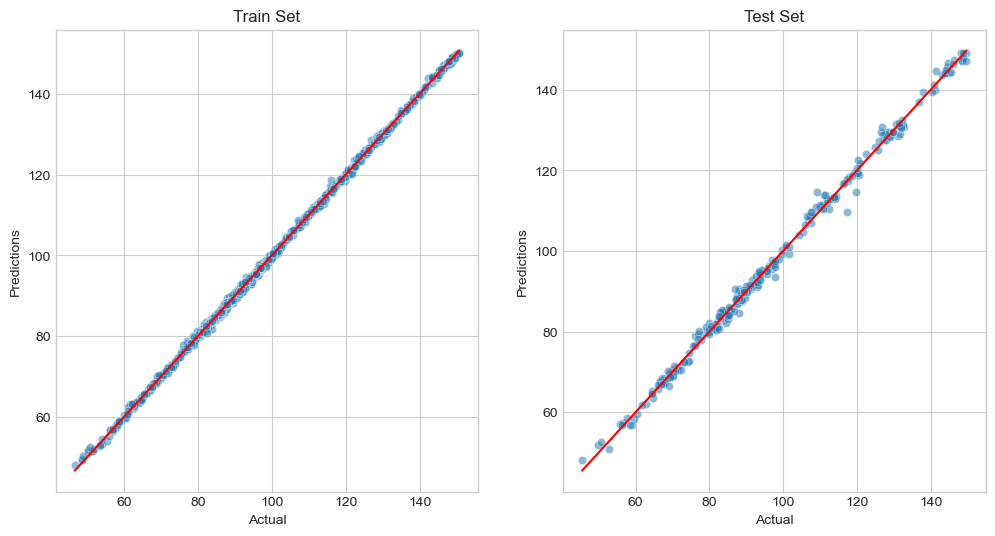

In [34]:
regression_performance(X_train, y_train, X_test, y_test,pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline, alpha_scatter=0.5)

In [35]:
print(f"Training on {len(X_train)} ITOT ETFs")
print(f"Testing on {len(X_test)} ITOT ETFs")

Training on 1204 ITOT ETFs
Testing on 302 ITOT ETFs


In [36]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [37]:
y_pred

array([112.0738774 , 108.54081622,  95.26332814,  88.9938005 ,
        58.35356084,  92.971689  ,  76.04240289, 117.25678328,
        90.35753523,  80.0116227 , 140.26029683,  77.02213798,
        92.59334639,  87.182609  ,  97.5338696 ,  84.01922594,
        58.09745154,  67.25102256, 131.33013112,  92.63117997,
       148.42885493, 111.28380178, 144.77207515,  96.16938589,
        99.56811888, 131.16031736,  67.73755898,  71.54281225,
        72.00638686,  96.10722288,  84.50323741,  85.99521293,
        75.64895521, 145.17210552,  61.354814  , 112.77692118,
        66.72094379, 129.54745492,  89.49776075,  84.00511519,
        56.26896809,  67.64007367, 125.63291018,  92.59879221,
        80.18242756,  87.7112909 ,  82.34676281,  83.36261382,
       130.4715651 ,  93.62334553, 129.2940701 ,  89.25437626,
        87.25802482,  82.63874341, 129.35996286,  91.36210832,
       129.91367021,  85.09844077, 144.51853644,  92.65943784,
       105.27147781,  57.87547434,  83.87896331,  67.36

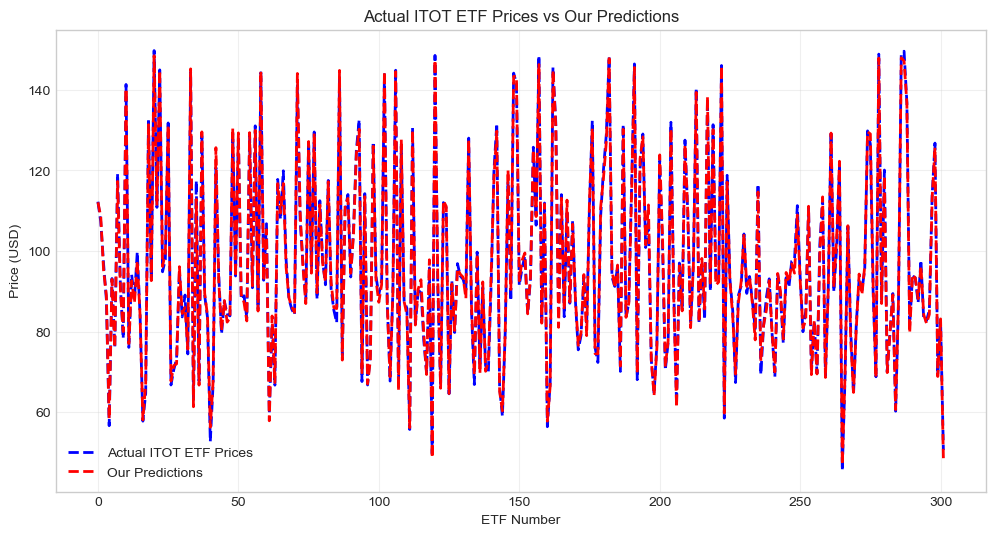

In [38]:
# Simple line plot - Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot both lines
x_axis = range(len(y_test))
plt.plot(x_axis, y_test.values, 'b--', label='Actual ITOT ETF Prices', linewidth=2)
plt.plot(x_axis, y_pred, 'r--', label='Our Predictions', linewidth=2)

plt.xlabel('ETF Number')
plt.ylabel('Price (USD)')
plt.title('Actual ITOT ETF Prices vs Our Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [39]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("REGRESSION METRICS EXPLAINED:")
print("=" * 50)
print()
print("Mean Absolute Error (MAE)")
print(f"   Your MAE: ${mae:,.0f}")
print("   What it means: On average, our predictions are off by this much")
print("   Think of it as: The typical mistake we make")
print("   Goal: Lower is better!")
print()
print("R² Score (R-squared)")
print(f"   Your R²: {r2:.1%}")
print("   What it means: How much of the price variation we can explain")
print("   Think of it as: Our model's grade out of 100%")
print("   Goal: Higher is better (100% = perfect, 0% = terrible)")
print()
print("Quick Guide:")
print("   R² > 80% = Great!")
print("   R² 70-80% = Good")
print("   R² 60-70% = OK")
print("   R² < 60% = Needs improvement")

REGRESSION METRICS EXPLAINED:

Mean Absolute Error (MAE)
   Your MAE: $1
   What it means: On average, our predictions are off by this much
   Think of it as: The typical mistake we make
   Goal: Lower is better!

R² Score (R-squared)
   Your R²: 99.6%
   What it means: How much of the price variation we can explain
   Think of it as: Our model's grade out of 100%
   Goal: Higher is better (100% = perfect, 0% = terrible)

Quick Guide:
   R² > 80% = Great!
   R² 70-80% = Good
   R² 60-70% = OK
   R² < 60% = Needs improvement


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

def pipeline_adaboost_reg():
    pipeline = Pipeline([
        ("feat_scaling", StandardScaler()),
        ("feat_selection", SelectFromModel(RandomForestRegressor(random_state=101))),
        ("model", RandomForestRegressor(random_state=101)),
    ])
    return pipeline

In [41]:
pipe = pipeline_adaboost_reg()
pipe.fit(X_train, y_train)

# 1. Get the fitted selector and its mask
selector = pipe.named_steps["feat_selection"]
support_mask = selector.get_support()              # boolean array
selected_features = X_train.columns[support_mask]  # names of selected features

print("Selected features:", list(selected_features))

Selected features: ['CPI_Inflation', 'Personal_Consumption_Expenditures', 'Core_CPI_(ex_Food/Energy)', '10-Year_Breakeven_Inflation', 'Nonfarm_Payrolls', 'Chicago_Fed_National_Financial_Conditions', 'Moodys_BAA_Corporate_Bond_Yield', 'Capacity_Utilization:_Manufacturing']


In [42]:
pipe = pipeline_adaboost_reg()
pipe.fit(X_train, y_train)

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=101))),
                ('model', RandomForestRegressor(random_state=101))])

In [43]:
selector = pipe.named_steps["feat_selection"]
support_mask = selector.get_support()              # boolean array
selected_features = X_train.columns[support_mask]  # names of selected features

print("Selected features:", list(selected_features))

Selected features: ['CPI_Inflation', 'Personal_Consumption_Expenditures', 'Core_CPI_(ex_Food/Energy)', '10-Year_Breakeven_Inflation', 'Nonfarm_Payrolls', 'Chicago_Fed_National_Financial_Conditions', 'Moodys_BAA_Corporate_Bond_Yield', 'Capacity_Utilization:_Manufacturing']


In [44]:
import numpy as np
import pandas as pd

rf = selector.estimator_                          # the fitted RandomForestRegressor
importances = rf.feature_importances_             # array aligned with original columns

feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances,
})

# Sort and take top 15
feat_imp = feat_imp.sort_values("importance", ascending=False)
top15 = feat_imp.head(15).copy()

# Percentage of total importance
total_imp = feat_imp["importance"].sum()
top15["importance_pct"] = 100 * top15["importance"] / total_imp

print(top15)

                                      feature  importance  importance_pct
5                               CPI_Inflation    0.224703       22.470315
24                           Nonfarm_Payrolls    0.181203       18.120270
19                  Core_CPI_(ex_Food/Energy)    0.180097       18.009703
16          Personal_Consumption_Expenditures    0.174940       17.493974
20                10-Year_Breakeven_Inflation    0.063655        6.365534
43  Chicago_Fed_National_Financial_Conditions    0.044225        4.422485
46            Moodys_BAA_Corporate_Bond_Yield    0.026759        2.675928
47        Capacity_Utilization:_Manufacturing    0.020299        2.029852
36                             M2_Money_Stock    0.019313        1.931308
38                              Monetary_Base    0.017773        1.777268
10                       Producer_Price_Index    0.007228        0.722813
37              ON_RRP_(Reverse_Repo)_Balance    0.005277        0.527661
39              Commercial_&_Industria

In [45]:
top15_names = set(top15["feature"])
selected_set = set(selected_features)

intersection = top15_names & selected_set
match_pct = 100 * len(intersection) / len(top15_names)

print("Overlap features:", intersection)
print("Match percentage:", match_pct)

Overlap features: {'CPI_Inflation', 'Core_CPI_(ex_Food/Energy)', 'Chicago_Fed_National_Financial_Conditions', 'Moodys_BAA_Corporate_Bond_Yield', 'Personal_Consumption_Expenditures', 'Nonfarm_Payrolls', '10-Year_Breakeven_Inflation', 'Capacity_Utilization:_Manufacturing'}
Match percentage: 53.333333333333336
